In [11]:
from tensorflow.keras.models import Sequential 

In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [2]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

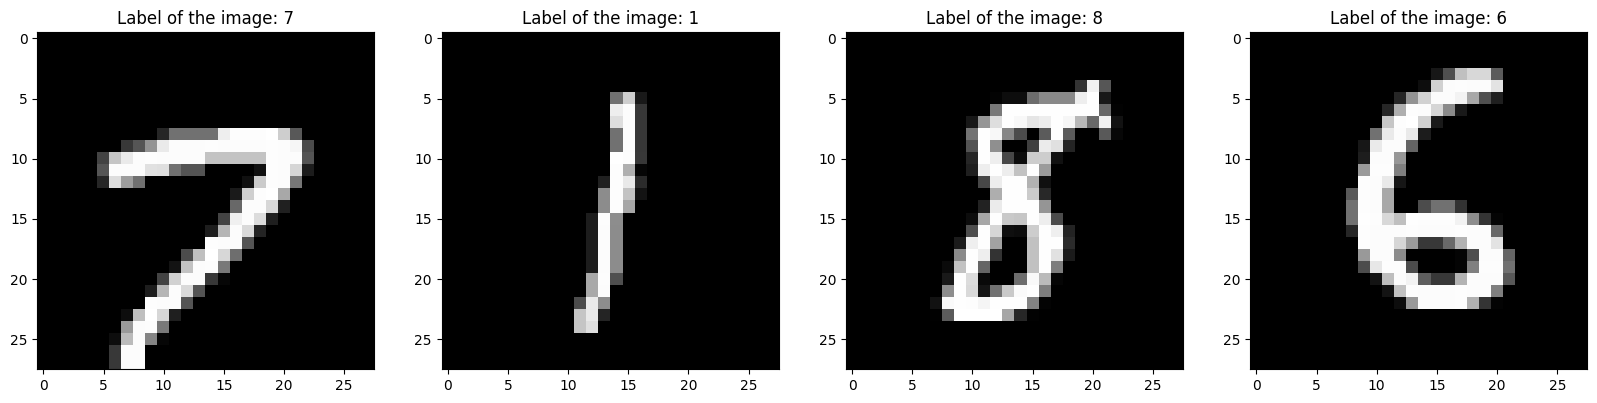

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

* Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the tanh activation function for each layer.
* Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the sigmoid activation function for each layer.
* Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the ReLU activation function for each layer.
* Compare the results of each model. Which activation function performed best?

In [19]:
# define model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses
def build_model(activation_function):
  model = Sequential()
  # The first dense layer
  model.add(Dense(128, input_shape=(784,), activation=activation_function))
  # The second dense layer
  model.add(Dense(64, activation=activation_function))
  # The last layer is the output layer
  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model
def train_me(model,loss_function):
  model.compile(optimizer='sgd', loss=loss_function,
              metrics=['accuracy'])
  # Setting `verbose=1` prints out some results after each epoch
  model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)
def print_scores(model):
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])

In [20]:
for activation_function in ('tanh','sigmoid','relu'):
    print("model running with "+activation_function)
    model = build_model(activation_function)
    train_me(model,losses.categorical_crossentropy)
    print_scores(model)

model running with tanh


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.6207 - loss: 1.4284
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8614 - loss: 0.5651
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8846 - loss: 0.4397
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8960 - loss: 0.3836
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9024 - loss: 0.3516
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9084 - loss: 0.3273
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9133 - loss: 0.3070
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.9155 - loss: 0.2989
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9209 - loss: 0.2846
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9211 - loss: 0.2761
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9245 - loss: 0.2663
Epoch 12/20
469/469 ━━━━━━━━━━

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.1430 - loss: 2.3491
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.3037 - loss: 2.2396
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.4224 - loss: 2.1771
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5343 - loss: 2.0906
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.5822 - loss: 1.9660
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.6153 - loss: 1.7994
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.6551 - loss: 1.6117
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.6888 - loss: 1.4232
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.7228 - loss: 1.2671
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7395 - loss: 1.1347
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.7672 - loss: 1.0225
Epoch 12/20
469/469 ━━━━━━━━━━

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.4930 - loss: 1.7267
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8687 - loss: 0.5277
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8946 - loss: 0.3880
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9053 - loss: 0.3388
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9092 - loss: 0.3179
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9179 - loss: 0.2916
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.9217 - loss: 0.2783
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9278 - loss: 0.2574
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9298 - loss: 0.2479
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9326 - loss: 0.2405
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.9349 - loss: 0.2293
Epoch 12/20
469/469 ━━━━━━━━━━

###  relu and tanh were better compared to sigmoid

* repeat models with use the hinge loss function as the loss function

In [21]:
for activation_function in ('tanh','sigmoid','relu'):
    print("model running with "+activation_function)
    model = build_model(activation_function)
    train_me(model,losses.hinge)
    print_scores(model)

model running with tanh


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.1535 - loss: 1.0780
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.2758 - loss: 1.0711
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.3356 - loss: 1.0612
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.3823 - loss: 1.0488
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.4248 - loss: 1.0382
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.4694 - loss: 1.0287
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.4977 - loss: 1.0212
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5371 - loss: 1.0146
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5835 - loss: 1.0079
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.6280 - loss: 1.0020
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6736 - loss: 0.9967
Epoch 12/20
469/469 ━━━━━━━━━━

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.1100 - loss: 1.0800
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.1043 - loss: 1.0799
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.0989 - loss: 1.0800
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.0995 - loss: 1.0798
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.0982 - loss: 1.0798
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.0975 - loss: 1.0797
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.0991 - loss: 1.0797
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.0976 - loss: 1.0797
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.0958 - loss: 1.0797
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.0995 - loss: 1.0796
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.1007 - loss: 1.0795
Epoch 12/20
469/469 ━━━━━━━━━━

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.1211 - loss: 1.0790
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.1768 - loss: 1.0779
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.2338 - loss: 1.0764
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.2712 - loss: 1.0743
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.2843 - loss: 1.0711
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.2799 - loss: 1.0669
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.2808 - loss: 1.0623
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.3007 - loss: 1.0570
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.3132 - loss: 1.0520
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.3340 - loss: 1.0471
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.3732 - loss: 1.0418
Epoch 12/20
469/469 ━━━━━━━━━━

## overall categorical_crossentropy loss function having better performance of the model , also tanh activation is resulting better model performance. relu activation performance also comparable to tanh